In [566]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [567]:
#Lectura de datos
#aplRecord = almacena los datos demográficos del aplicante
aplRecord = pd.read_csv("C:\\Users\\corral02\\Desktop\\mtr\\Tratamiento de datos\\Clase3\\proyecto\\application_record.csv", delimiter=',')

#cRecord = almacena el movimiento de pagos 
cRecord = pd.read_csv("C:\\Users\\corral02\\Desktop\\mtr\\Tratamiento de datos\\Clase3\\proyecto\\credit_record.csv", delimiter=',')

In [568]:
# Chequeo general de la base
aplRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [569]:
# Chequeo general de la base
aplRecord.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [570]:
aplRecord.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [571]:
# Chequeo general de la base
cRecord

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [572]:
# Chequeo general de la base
print(cRecord.shape)

print(aplRecord.shape)

(1048575, 3)
(438557, 18)


In [573]:
aplRecord.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [574]:
aplRecord

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


array([[<AxesSubplot:title={'center':'Commercial associate'}>,
        <AxesSubplot:title={'center':'Pensioner'}>],
       [<AxesSubplot:title={'center':'State servant'}>,
        <AxesSubplot:title={'center':'Student'}>],
       [<AxesSubplot:title={'center':'Working'}>, <AxesSubplot:>]],
      dtype=object)

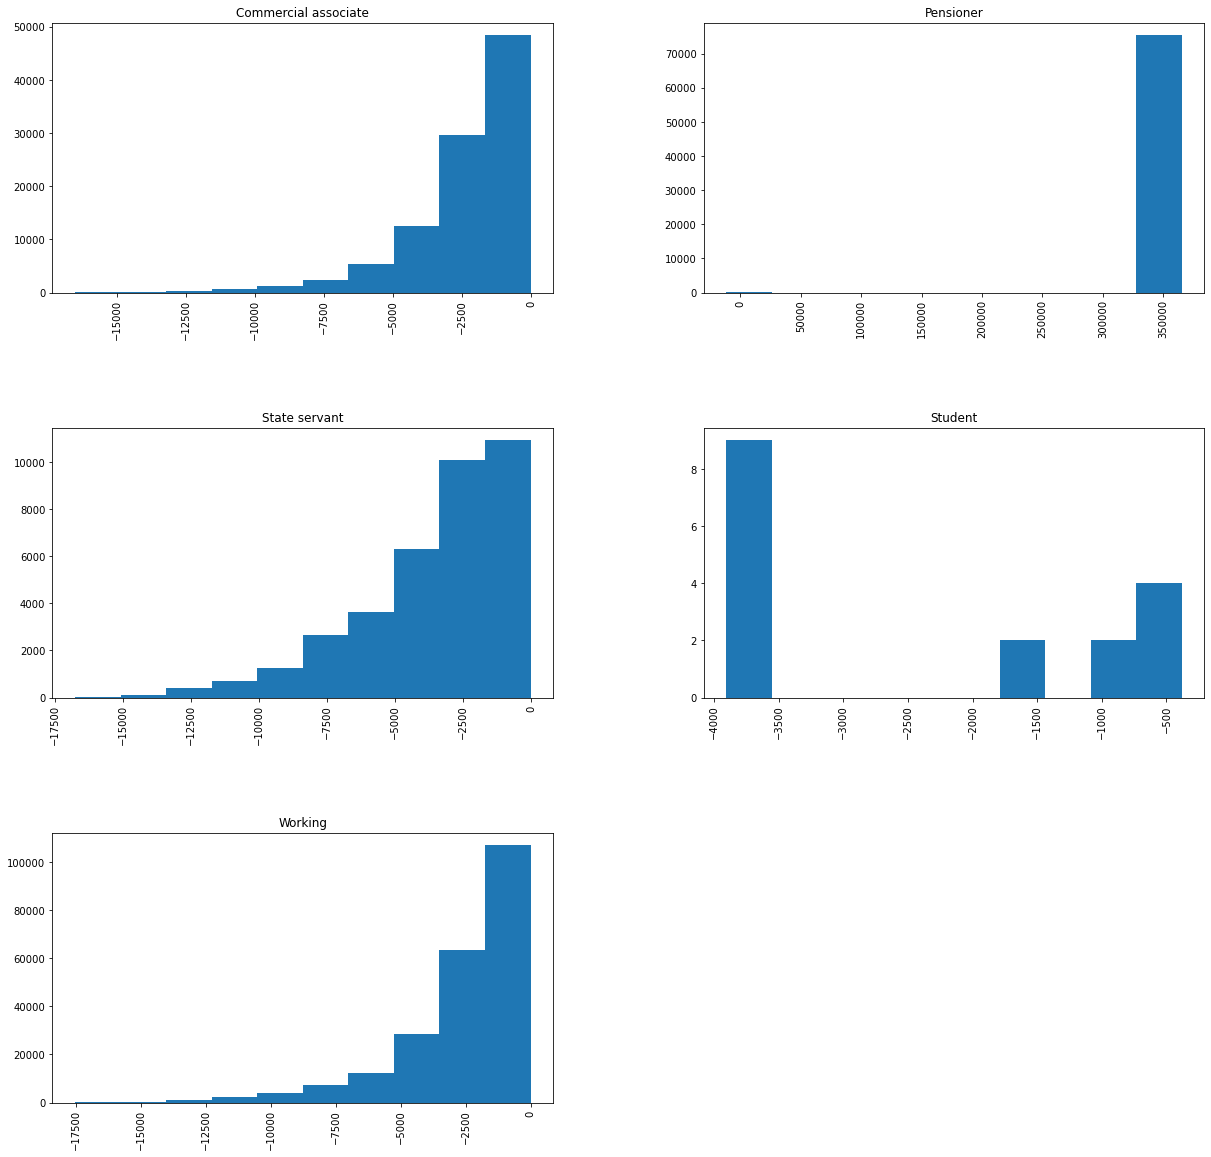

In [575]:
aplRecord[['DAYS_EMPLOYED','NAME_INCOME_TYPE']].hist(by='NAME_INCOME_TYPE', figsize=(20, 20))

<AxesSubplot:>

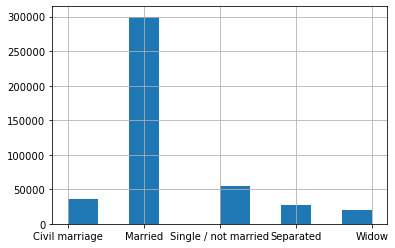

In [576]:
aplRecord['NAME_FAMILY_STATUS'].hist()
#aplRecord[['NAME_FAMILY_STATUS','AMT_INCOME_TOTAL']].hist(by='AMT_INCOME_TOTAL', figsize=(20, 20))

In [577]:
#Para practicar con el modo de cambio uno por uno
aplRecord.loc[aplRecord['CODE_GENDER'] == 'F', 'CODE_GENDER'] = 1
aplRecord.loc[aplRecord['CODE_GENDER'] == 'M', 'CODE_GENDER'] = 0
aplRecord.loc[aplRecord['FLAG_OWN_CAR'] == 'Y', 'FLAG_OWN_CAR'] = 1
aplRecord.loc[aplRecord['FLAG_OWN_CAR'] == 'N', 'FLAG_OWN_CAR'] = 0
aplRecord.loc[aplRecord['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
aplRecord.loc[aplRecord['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0

#Prráctica con mapping
tipoH = {'House / apartment' : '1',
                   'With parents': '2',
                    'Municipal apartment' : '3',
                    'Rented apartment': '4',
                    'Office apartment': '5',
                    'Co-op apartment': '6'}
              

tipoE = {'Secondary / secondary special':1,
                     'Lower secondary':2,
                     'Higher education':3,
                     'Incomplete higher':4,
                     'Academic degree':5}

estadoC = {'Single / not married':1,
                     'Separated':2,
                     'Widow':3,
                     'Civil marriage':4,
                    'Married':5}
                    
tipoI = {'Commercial associate':1,
                  'State servant':2,
                  'Working':3,
                  'Pensioner':4,
                  'Student':5}                    
aplRecord['NAME_HOUSING_TYPE'] = aplRecord['NAME_HOUSING_TYPE'].map(tipoH)
aplRecord['NAME_INCOME_TYPE'] = aplRecord['NAME_INCOME_TYPE'].map(tipoI)
aplRecord['NAME_EDUCATION_TYPE']=aplRecord['NAME_EDUCATION_TYPE'].map(tipoE)
aplRecord['NAME_FAMILY_STATUS']=aplRecord['NAME_FAMILY_STATUS'].map(estadoC)
aplRecord['AGE'] = - round(aplRecord['DAYS_BIRTH'] / 365).astype('int64')
aplRecord['YEARw'] = - round(aplRecord['DAYS_EMPLOYED'] / 365).astype('int64')
aplRecord.loc[aplRecord['YEARw'] <0, 'YEARw'] = 45
aplRecord['NAME_HOUSING_TYPE'] = aplRecord['NAME_HOUSING_TYPE'].astype('int64')
aplRecord['FLAG_OWN_CAR'] = aplRecord['FLAG_OWN_CAR'].astype('int64')
aplRecord['FLAG_OWN_REALTY'] = aplRecord['FLAG_OWN_REALTY'].astype('int64')
aplRecord['CODE_GENDER'] = aplRecord['CODE_GENDER'].astype('int64')
aplRecord['CNT_FAM_MEMBERS']=aplRecord['CNT_FAM_MEMBERS'].astype('int64')
#aplRecord = aplRecord.drop('OCCUPATION_TYPE', axis = 1)
aplRecord = aplRecord.drop('DAYS_BIRTH', axis = 1)
aplRecord = aplRecord.drop('DAYS_EMPLOYED', axis = 1)
aplRecord = aplRecord.drop('AMT_INCOME_TOTAL', axis = 1)


array([[<AxesSubplot:title={'center':'Accountants'}>,
        <AxesSubplot:title={'center':'Cleaning staff'}>,
        <AxesSubplot:title={'center':'Cooking staff'}>,
        <AxesSubplot:title={'center':'Core staff'}>],
       [<AxesSubplot:title={'center':'Drivers'}>,
        <AxesSubplot:title={'center':'HR staff'}>,
        <AxesSubplot:title={'center':'High skill tech staff'}>,
        <AxesSubplot:title={'center':'IT staff'}>],
       [<AxesSubplot:title={'center':'Laborers'}>,
        <AxesSubplot:title={'center':'Low-skill Laborers'}>,
        <AxesSubplot:title={'center':'Managers'}>,
        <AxesSubplot:title={'center':'Medicine staff'}>],
       [<AxesSubplot:title={'center':'Private service staff'}>,
        <AxesSubplot:title={'center':'Realty agents'}>,
        <AxesSubplot:title={'center':'Sales staff'}>,
        <AxesSubplot:title={'center':'Secretaries'}>],
       [<AxesSubplot:title={'center':'Security staff'}>,
        <AxesSubplot:title={'center':'Waiters/barmen st

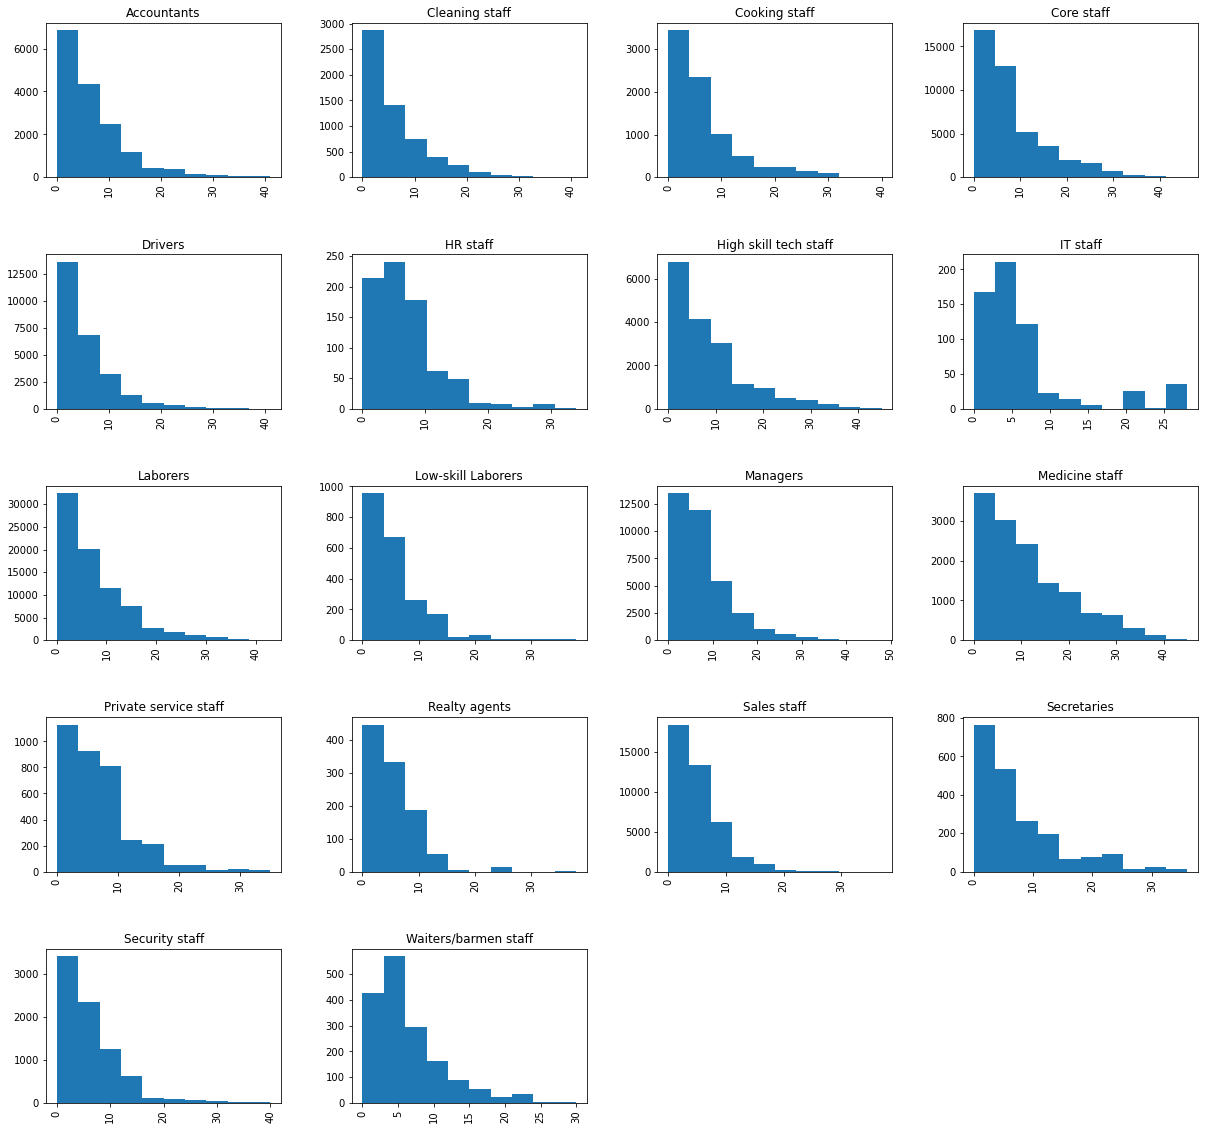

In [578]:
aplRecord[['YEARw','OCCUPATION_TYPE']].hist(by='OCCUPATION_TYPE', figsize=(20, 20))

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

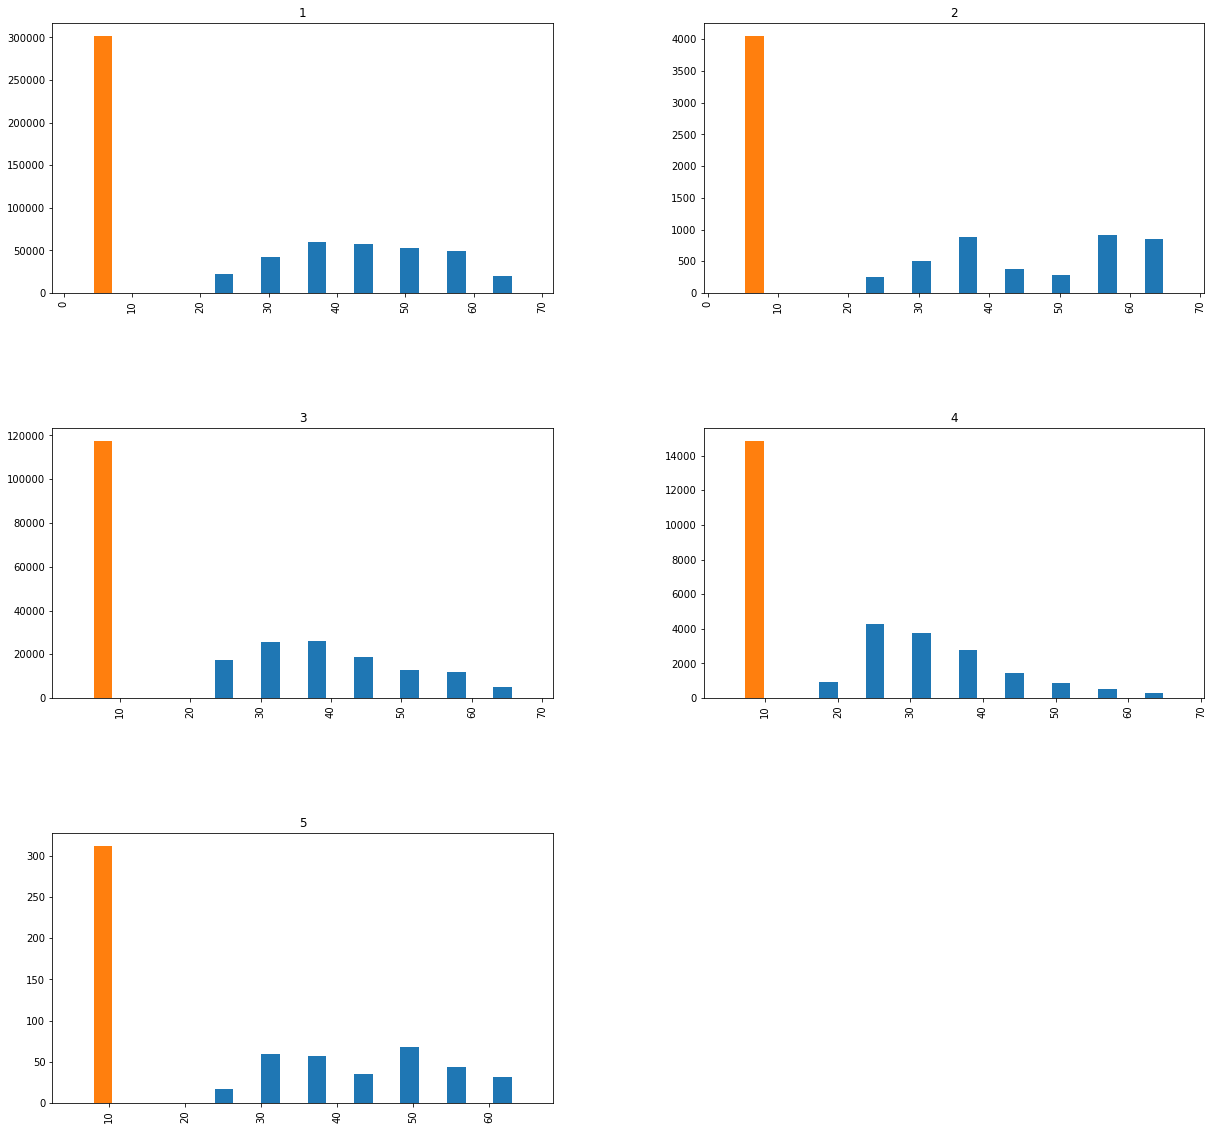

In [579]:
aplRecord[['AGE','NAME_EDUCATION_TYPE']].hist(by='NAME_EDUCATION_TYPE', figsize=(20, 20))

In [580]:
aplRecord = aplRecord.drop('OCCUPATION_TYPE', axis = 1)

In [581]:
CV_APPL = aplRecord.copy()
CV_Record = cRecord.copy()

In [582]:
CV_APPL

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw
0,5008804,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12
1,5008805,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12
2,5008806,0,1,1,0,3,1,5,1,1,0,0,0,2,59,3
3,5008808,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8
4,5008809,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,4,1,2,1,1,0,0,0,1,62,45
438553,6840222,1,0,0,0,3,1,1,1,1,0,0,0,1,44,8
438554,6841878,1,0,0,0,1,3,1,2,1,1,0,0,1,22,1
438555,6842765,1,0,1,0,4,1,5,1,1,0,0,0,2,59,45


In [583]:
CV_APPL.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
AGE                    0
YEARw                  0
dtype: int64

In [584]:
CV_APPL

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw
0,5008804,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12
1,5008805,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12
2,5008806,0,1,1,0,3,1,5,1,1,0,0,0,2,59,3
3,5008808,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8
4,5008809,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,4,1,2,1,1,0,0,0,1,62,45
438553,6840222,1,0,0,0,3,1,1,1,1,0,0,0,1,44,8
438554,6841878,1,0,0,0,1,3,1,2,1,1,0,0,1,22,1
438555,6842765,1,0,1,0,4,1,5,1,1,0,0,0,2,59,45


In [585]:

cRecord.groupby("ID").count()
grouped = cRecord.groupby('ID')
#tabla pivot
tabla = cRecord.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
tabla['pagado'] = tabla[tabla.iloc[:,0:61] == 'C'].count(axis = 1)
tabla['vencido_1_29'] = tabla[tabla.iloc[:,0:61] == '0'].count(axis = 1)
tabla['vencido_30_59'] = tabla[tabla.iloc[:,0:61] == '1'].count(axis = 1)
tabla['vencido_60_89'] = tabla[tabla.iloc[:,0:61] == '2'].count(axis = 1)
tabla['vencido_90_119'] = tabla[tabla.iloc[:,0:61] == '3'].count(axis = 1)
tabla['vencido_120_149'] = tabla[tabla.iloc[:,0:61] == '4'].count(axis = 1)
tabla['vencido_150'] = tabla[tabla.iloc[:,0:61] == '5'].count(axis = 1)
tabla['sinRecargo'] = tabla[tabla.iloc[:,0:61] == 'X'].count(axis = 1)


In [586]:
tabla['ID'] = tabla.index

In [587]:
tabla.head(100)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,0,pagado,vencido_1_29,vencido_30_59,vencido_60_89,vencido_90_119,vencido_120_149,vencido_150,sinRecargo,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,0,0,0,0,0,0,0,60,5001715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001837,NaN,NaN,NaN,0,0,0,0,0,0,0,...,C,44,14,0,0,0,0,0,0,5001837
5001838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,39,0,0,0,0,0,0,5001838
5001839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,7,9,0,0,0,0,0,0,5001839


In [588]:
# Función para el cálculo del Target basado en la tabla pivot anterior
def asignaT(data):
    TipoCliente = []
    for index, row in data.iterrows():
        pagado = row['pagado']
        vencido_1_29 = row['vencido_1_29']
        vencido_30_59 = row['vencido_30_59']
        vencido_60_89 = row['vencido_60_89'] 
        vencido_90_119 = row['vencido_90_119']
        vencidomayor120 = row['vencido_120_149'] + row['vencido_150']
        sinRecargo = row['sinRecargo']
            
        vencimientoTotal = vencido_1_29+vencido_30_59+vencido_60_89+vencido_90_119+vencidomayor120    
            
        if vencimientoTotal == 0:
            if pagado >= sinRecargo or pagado <= sinRecargo:
                TipoCliente.append(1)
            elif pagado == 0 and sinRecargo == 1:
                TipoCliente.append(1)
        
        elif vencimientoTotal != 0:
            if pagado > vencimientoTotal:
                TipoCliente.append(1)
            elif pagado <= vencimientoTotal:
                TipoCliente.append(0)
        
        elif pagado == 0 and sinRecargo != 0:
            if vencimientoTotal <= sinRecargo or vencimientoTotal >= sinRecargo:
                TipoCliente.append(0)

        else:
            TipoCliente.append(1)
                
        
    return TipoCliente

In [589]:
#Armado de la tabla con el num de vencimientos y asignación del target malo = 0 y bueno = 1
target = pd.DataFrame()
target['ID'] = tabla.index
target['pagado'] = tabla['pagado'].values
target['# de vencimientos'] = tabla['vencido_1_29'].values+ tabla['vencido_30_59'].values + tabla['vencido_60_89'].values +tabla['vencido_90_119'].values+tabla['vencido_120_149'].values +tabla['vencido_150'].values
target['sin recargo'] = tabla['sinRecargo'].values
target['target'] = asignaT(tabla)


In [590]:
target

,ID,pagado,# de vencimientos,sin recargo,target
0,5001711,0,3,1,0
1,5001712,9,10,0,0
2,5001713,0,0,22,1
3,5001714,0,0,15,1
4,5001715,0,0,60,1
...,...,...,...,...,...
45980,5150482,6,12,0,0
45981,5150483,0,0,18,1
45982,5150484,1,12,0,0
45983,5150485,0,2,0,0


In [591]:
credit_app = CV_APPL.merge(target, how = 'inner', on = 'ID')
credit_app.drop('ID', axis = 1, inplace = True)

In [592]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw,pagado,# de vencimientos,sin recargo,target
0,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12,13,2,1,1
1,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12,12,2,1,1
2,0,1,1,0,3,1,5,1,1,0,0,0,2,59,3,7,7,16,0
3,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8,0,2,3,0
4,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,1,1,0,3,1,5,1,1,0,0,0,2,48,7,0,4,8,0
36453,1,0,1,0,1,3,5,1,1,0,1,1,2,34,4,5,19,0,0
36454,1,0,1,0,4,3,5,1,1,0,1,1,2,34,4,14,19,0,0
36455,1,0,1,0,3,1,5,1,1,0,0,0,2,49,2,0,10,0,0


<AxesSubplot:>

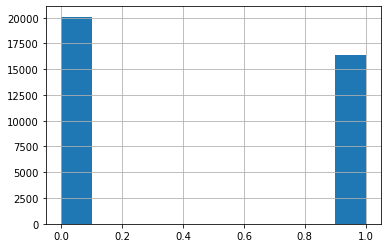

In [593]:
credit_app['target'].hist()

<AxesSubplot:xlabel='CODE_GENDER'>

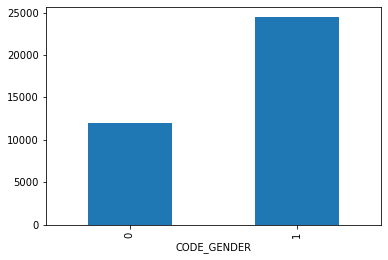

In [600]:
credit_app.groupby('CODE_GENDER').count()['target'].plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw,pagado,# de vencimientos,sin recargo,target
0,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12,13,2,1,1
1,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12,12,2,1,1
2,0,1,1,0,3,1,5,1,1,0,0,0,2,59,3,7,7,16,0
3,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8,0,2,3,0
4,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,1,1,0,3,1,5,1,1,0,0,0,2,48,7,0,4,8,0
36453,1,0,1,0,1,3,5,1,1,0,1,1,2,34,4,5,19,0,0
36454,1,0,1,0,4,3,5,1,1,0,1,1,2,34,4,14,19,0,0
36455,1,0,1,0,3,1,5,1,1,0,0,0,2,49,2,0,10,0,0


In [ ]:
y = credit_app['target']

In [ ]:
y

0        1
1        1
2        0
3        0
4        1
        ..
36452    0
36453    0
36454    0
36455    0
36456    0
Name: target, Length: 36457, dtype: int64

In [ ]:
x = credit_app[credit_app.drop('target', axis = 1).columns]
y = credit_app['target']


In [ ]:
#x = x.values
#y = y.values

In [ ]:
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw,pagado,# de vencimientos,sin recargo
0,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12,13,2,1
1,0,1,1,0,3,3,4,4,1,1,0,0,2,33,12,12,2,1
2,0,1,1,0,3,1,5,1,1,0,0,0,2,59,3,7,7,16
3,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8,0,2,3
4,1,0,1,0,1,1,1,1,1,0,1,1,1,52,8,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,1,1,0,3,1,5,1,1,0,0,0,2,48,7,0,4,8
36453,1,0,1,0,1,3,5,1,1,0,1,1,2,34,4,5,19,0
36454,1,0,1,0,4,3,5,1,1,0,1,1,2,34,4,14,19,0
36455,1,0,1,0,3,1,5,1,1,0,0,0,2,49,2,0,10,0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 0)
print("%r, %r, %r" % (x.shape, xtrain.shape, xtest.shape))

xtrain

(36457, 18), (25519, 18), (10938, 18)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw,pagado,# de vencimientos,sin recargo
917,1,1,1,0,2,1,5,1,1,0,0,0,2,57,11,24,17,1
3361,1,0,1,0,4,1,3,1,1,0,0,0,1,65,45,0,4,0
24055,1,1,0,1,3,3,4,1,1,1,1,0,3,37,3,23,7,0
23069,1,0,1,2,3,3,5,1,1,0,1,0,4,38,9,0,3,5
34338,1,0,1,0,4,1,2,1,1,0,0,0,1,46,45,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1,0,0,0,4,1,5,1,1,0,1,0,2,63,45,0,8,2
32103,1,1,1,0,4,3,5,1,1,0,0,0,2,59,45,14,3,0
30403,1,0,0,0,3,4,2,1,1,0,1,0,1,31,5,0,8,0
21243,1,0,1,2,3,3,5,1,1,1,1,1,4,41,1,0,19,1


In [ ]:
from sklearn import metrics
clf = KNeighborsClassifier(n_neighbors=1).fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

print(metrics.confusion_matrix(ytest, y_pred))
print(metrics.classification_report(ytest, y_pred))

[[5795  200]
 [ 213 4730]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5995
           1       0.96      0.96      0.96      4943

    accuracy                           0.96     10938
   macro avg       0.96      0.96      0.96     10938
weighted avg       0.96      0.96      0.96     10938



In [ ]:
ytrain

917      1
3361     0
24055    1
23069    0
34338    0
        ..
20757    0
32103    1
30403    0
21243    0
2732     0
Name: target, Length: 25519, dtype: int64

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)


In [ ]:
clf = clf.fit(xtrain, ytrain)

In [ ]:
clf

DecisionTreeClassifier(max_depth=3)

In [ ]:
xtrain

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw,pagado,# de vencimientos,sin recargo
917,1,1,1,0,2,1,5,1,1,0,0,0,2,57,11,24,17,1
3361,1,0,1,0,4,1,3,1,1,0,0,0,1,65,45,0,4,0
24055,1,1,0,1,3,3,4,1,1,1,1,0,3,37,3,23,7,0
23069,1,0,1,2,3,3,5,1,1,0,1,0,4,38,9,0,3,5
34338,1,0,1,0,4,1,2,1,1,0,0,0,1,46,45,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1,0,0,0,4,1,5,1,1,0,1,0,2,63,45,0,8,2
32103,1,1,1,0,4,3,5,1,1,0,0,0,2,59,45,14,3,0
30403,1,0,0,0,3,4,2,1,1,0,1,0,1,31,5,0,8,0
21243,1,0,1,2,3,3,5,1,1,1,1,1,4,41,1,0,19,1


In [ ]:
ytrain

917      1
3361     0
24055    1
23069    0
34338    0
        ..
20757    0
32103    1
30403    0
21243    0
2732     0
Name: target, Length: 25519, dtype: int64

[Text(0.4230769230769231, 0.875, 'X[15] <= 7.5\ngini = 0.495\nsamples = 25519\nvalue = [14097, 11422]'),
 Text(0.15384615384615385, 0.625, 'X[16] <= 0.5\ngini = 0.316\nsamples = 16229\nvalue = [13037, 3192]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 2598\nvalue = [0, 2598]'),
 Text(0.23076923076923078, 0.375, 'X[15] <= 3.5\ngini = 0.083\nsamples = 13631\nvalue = [13037, 594]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.01\nsamples = 11854\nvalue = [11796, 58]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.421\nsamples = 1777\nvalue = [1241, 536]'),
 Text(0.6923076923076923, 0.625, 'X[16] <= 15.5\ngini = 0.202\nsamples = 9290\nvalue = [1060, 8230]'),
 Text(0.5384615384615384, 0.375, 'X[15] <= 12.5\ngini = 0.101\nsamples = 8356\nvalue = [445, 7911]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.368\nsamples = 1694\nvalue = [411, 1283]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.01\nsamples = 6662\nvalue = [34, 6628]'),
 Text(0.8461538461538461, 0.375, 'X[15] <= 21.5\n

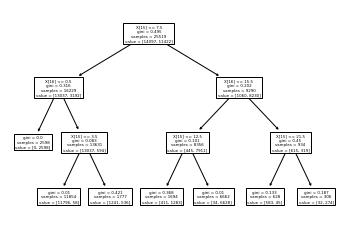

In [ ]:
tree.plot_tree(clf)

In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.33, random_state = 42)

y_pred = clf.predict(xtest)
 
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
xtest

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARw,pagado,# de vencimientos,sin recargo
35580,1,0,1,0,1,1,5,1,1,0,0,0,2,46,3,8,6,0
3763,0,1,1,0,1,1,5,1,1,0,0,0,2,43,4,22,6,1
9875,1,0,1,0,4,1,5,1,1,0,0,0,2,66,45,0,7,1
21832,1,0,1,1,3,1,2,1,1,1,1,0,2,30,6,0,1,4
32113,1,0,1,1,1,1,5,1,1,0,1,0,3,44,17,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11715,1,0,1,0,1,3,2,1,1,0,1,0,1,49,8,0,0,53
7265,1,0,1,0,3,1,5,1,1,0,0,0,2,56,4,8,12,0
19458,0,1,1,0,3,1,5,1,1,1,1,0,2,61,19,0,7,1
11947,0,0,0,2,3,3,4,1,1,1,0,0,4,46,8,0,7,2


In [ ]:
x = x
y = y

In [ ]:
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
confusion_matrix(ytest, y_pred,labels=[1,0])

array([[4686,  257],
       [ 282, 5713]], dtype=int64)

In [ ]:
y[0]

1

In [ ]:
np.array([x.iloc[0]])
#xtest[0]

array([[ 0,  1,  1,  0,  3,  3,  4,  4,  1,  1,  0,  0,  2, 33, 12, 13,
         2,  1]], dtype=int64)

In [ ]:
#clf.predict(np.array([x.iloc[0]]))
#clf.predict(xtest)
clf.predict(np.array([x.iloc[0]]))


c:\Users\corral02\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)